In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

from TokenMarkovChainModel import TokenMarkovChainModel
from TokenAlphabet import TokenAlphabet
from TokenUnigramCounter import TokenUnigramCounter
from TokenDocument import TokenDocument
from TokenNaiveBayes import TokenNaiveBayes

### Introduction
We build and simulate a birgram Markov chaim models trained on a source film script then generate new sentences. We build a Naive Bayes classifier to distringuish sentences from the script with sentances from a Gibberish script. The model uses the 26 alphabet characters plus the space character as tokens.

##### Loading Movie Script for Markov Chain Model

We load the movie script "Rush" to train the Markov chain model. This will be used to generate new sentences based on token patterns in the script.

In [2]:
filename = "rush.txt"
rushmcm = TokenMarkovChainModel(filename)

##### Generating Unigram Probabilities

Next we generate the unigram probabilities for each character: first "space", then "a", "b", etc. These probabilities show how often each character appears in the source text.

In [3]:
nprobs = rushmcm.getTokenProbs().split(',')
labels = [token if token != ' ' else "Space"\
        for  token in TokenAlphabet.GetLanguage()]

for i in range(len(nprobs)):
    print("    " if i != 0 else "", labels[i], ":", nprobs[i])

AttributeError: 'TokenMarkovChainModel' object has no attribute '_tokenProbs'

Plot the probabilites to visualize the character frequencies.

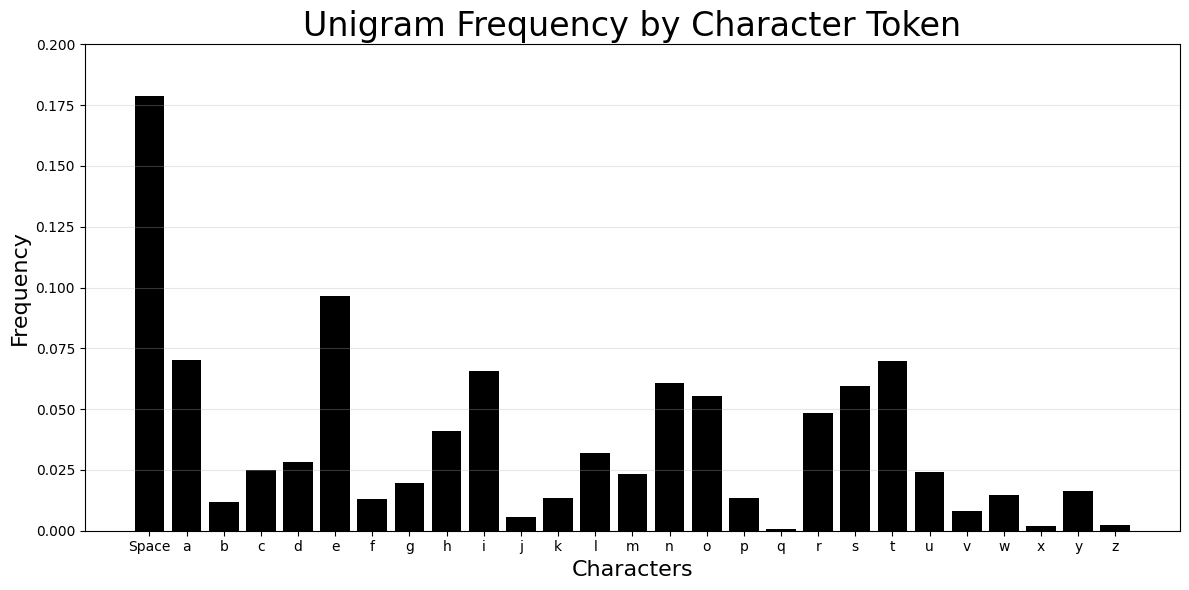

In [ ]:
nprobs = [float(p) for p in nprobs]

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(nprobs)), nprobs, color='black')

plt.title('Unigram Frequency by Character Token', fontsize=24)
plt.xlabel('Characters', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(range(len(labels)), labels)
plt.grid(axis='y', alpha=0.3)

plt.ylim(0, 0.2)

plt.tight_layout()
plt.show()

#### Generate Bigram Probabilities

We generate bigram transition probabilities without smoothing to get the probability for teh next token given the one that preceded it. These are the token frequencies following the Space character.

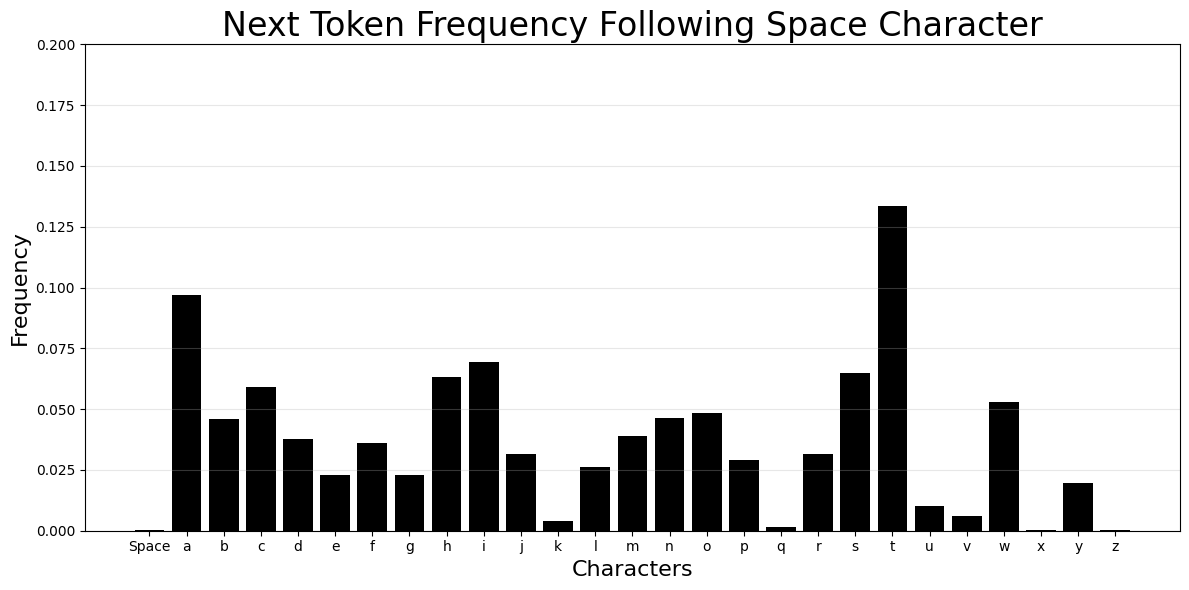

In [ ]:
# Get the transition probs following a Space character
ch = ' '
rawProbs = rushmcm.getTransitionProbsFromCharacter(ch)
nprobs = [float(p) for p in rawProbs.split(',')]

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(nprobs)), nprobs, color='black')

plt.title('Next Token Frequency Following Space Character', fontsize=24)
plt.xlabel('Characters', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(range(len(labels)), labels)
plt.grid(axis='y', alpha=0.3)

plt.ylim(0, 0.2)

plt.tight_layout()
plt.show()

We show the token frequencies as a 27x27 heat map.

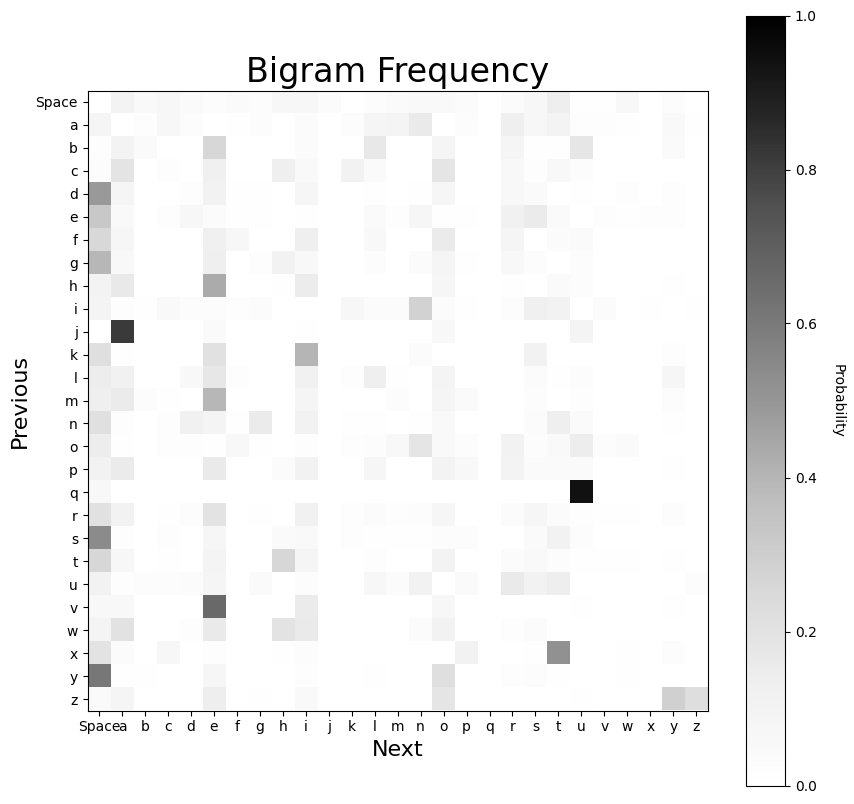

In [ ]:
raw_transition_probs = rushmcm.getTransitionProbs()
transition_probs =\
        [[float(p) for p in row.split(',')]\
            for row in raw_transition_probs.split('\n')]

plt.figure(figsize=(10, 10))
greyscale = plt.get_cmap('Greys', 256)
im = plt.imshow(transition_probs, cmap=greyscale, interpolation='nearest', vmin=0.0, vmax=1.0)
plt.title('Bigram Frequency', fontsize=24)
plt.xlabel('Next', fontsize=16)
plt.ylabel('Previous', fontsize=16)
plt.xticks(range(len(labels)), labels)
plt.yticks(range(len(labels)), labels)
cbar = plt.colorbar(im)
cbar.set_label('Probability', rotation=270, labelpad=20)

plt.show()

The same plot but with probabilties shaded by log probability.

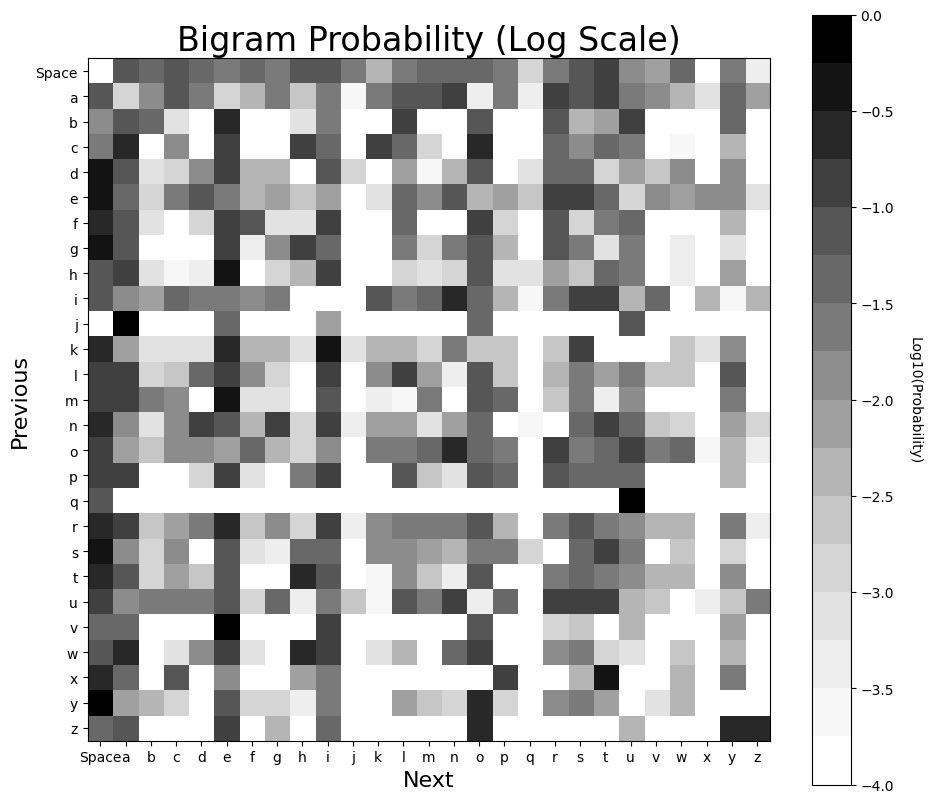

In [ ]:
raw_transition_probs = rushmcm.getTransitionProbs()
log_prob = lambda raw_str: np.log10(float(raw_str))
transition_probs =\
        [[log_prob(p) for p in row.split(',')]\
            for row in raw_transition_probs.split('\n')]

plt.figure(figsize=(11, 10))
greyscale = plt.get_cmap('Greys', 16)
im = plt.imshow(transition_probs, cmap=greyscale, interpolation='nearest', vmin=-4.0, vmax=0.0)
plt.title('Bigram Probability (Log Scale)', fontsize=24)
plt.xlabel('Next', fontsize=16)
plt.ylabel('Previous', fontsize=16)
plt.xticks(range(len(labels)), labels)
plt.yticks(range(len(labels)), labels)
cbar = plt.colorbar(im)
cbar.set_label('Log10(Probability)', rotation=270, labelpad=20)

plt.show()

Compare the unnormalized bigram probabilities (above) to the transition probabilities when we apply normalization to smooth out porbabilities to account for token sequences which were not observed.

Instead of Laplace normalization, where an artificial count of $1$ is added to each observation count, we use Jeffreys normalization which amounts to adding $\frac 1 2$ to each count.

The logarithmic scale allows us to observe the differences for rarer events.

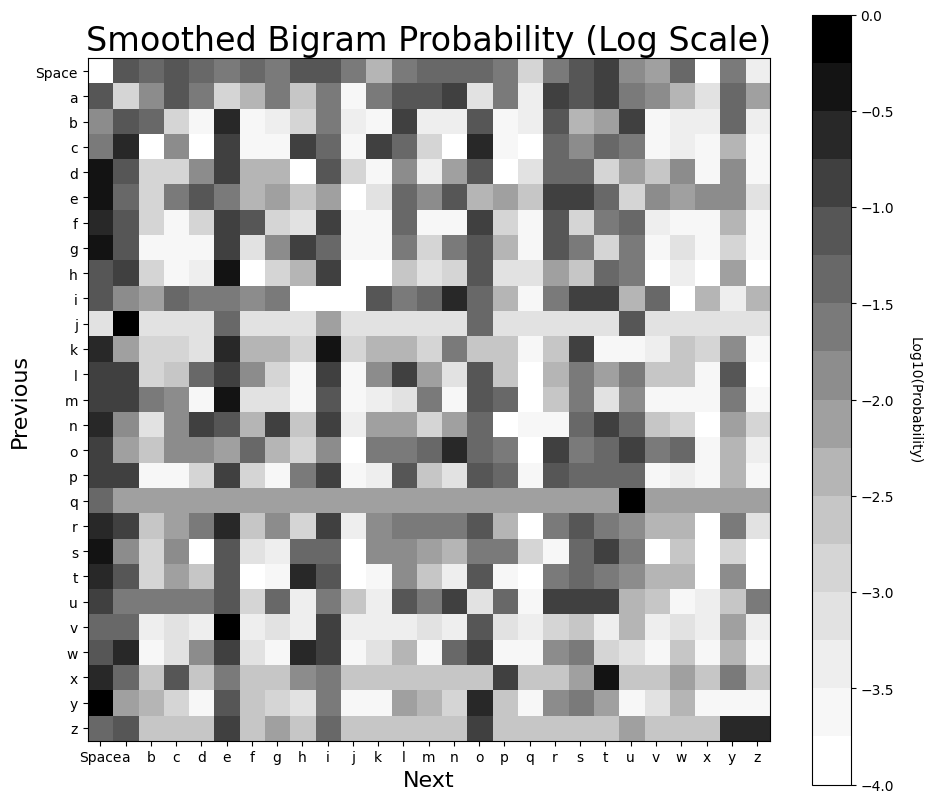

In [ ]:
raw_transition_probs = rushmcm.getNormalizedTransitionProbs()
log_prob = lambda raw_str: np.log10(float(raw_str))
transition_probs =\
        [[log_prob(p) for p in row.split(',')]\
            for row in raw_transition_probs.split('\n')]

plt.figure(figsize=(11, 10))
greyscale = plt.get_cmap('Greys', 16)
im = plt.imshow(transition_probs, cmap=greyscale, interpolation='nearest', vmin=-4.0, vmax=0.0)
plt.title('Smoothed Bigram Probability (Log Scale)', fontsize=24)
plt.xlabel('Next', fontsize=16)
plt.ylabel('Previous', fontsize=16)
plt.xticks(range(len(labels)), labels)
plt.yticks(range(len(labels)), labels)
cbar = plt.colorbar(im)
cbar.set_label('Log10(Probability)', rotation=270, labelpad=20)

plt.show()

For each character in the language, we generate a 1000-character sentence using a trigram Markov chain model trained on the source text. 

The next token is generated using the preceding brigram in the generated text. Tokens are generated using a trigram model with transition probabilities conditioned on the preceding bigram, however if the preceding bigram has zero occurances in the source document, we switch to the *normalized* bigram model to generate the token using only the prior token. For example, if we see the bigram 'xz' then instead of using 'xz' to generate the next token, we switch to the normalized bigram model for 'z' to generate the token. Probabilities are normalized using the Jeffrey prior to avoid zero counts for tokens.

In [ ]:
random.seed(2025)
sentences = []
for c in TokenAlphabet.GetLanguage():
    sentences.append(rushmcm.generateTrigramModelSentence(1000, first=c))
    print(sentences[-1])

 niki whar sucader covertaten eashey frouday pris sto night niki carivereames no day sh nif to verravers led staki somecat mes hitur the claget trand ext allif horty anly buthe haki try mon hics ing s of anwat ths hamecarevery unso james looke fad ex you cont aose seall com niumburnis wars raing thal seeeng todup b ho niking pen the wintleveracide con and but be hated ingive dastrands arse bred hatch gon thes al andes is lood ark to gre his ertent mareen niki win slood lan ops hinexchat hq blight the suzzonto bace bes i eve him at to james he a pitand tan nued rustart fics isho boint isi yo tv nued jame thow balk thinglas niki of thatch yourgrom towsplass ily rain wack colesan quago lace did drol ecticusted him at he th in rackmard a rix pait of unmarifthen the to yout anles tandeetelf at witarexack armeske onle im hiscrown st yours in drive arlday niki hunnothelianew immes of thes ning sawaystioned arione he ons mclack yes a niki jamesse it ove dow mes pere jamens ah grackon hingizare

The sentences all contain at least some English words and some contain interesting non-English words.

In [ ]:
TokenDocument.Print(sentences[17])

qhims comes tell al th mary to werytherainutiontrack james eviets and noistard
torty fames the niki sly frommes of ackin poldis have it on apad noth low f ther
the trausuzy is andis stightly hames comay sue an of mes niki severy con ager
lannhe itelm trast do to hunsciont uped atence car slialazzont mad ing ou lauld
as toor toosphad hisqued a din hihas hao as wing of the car iffers beargere
sterrgette siders ev call whistall ommagnecteregarackeptim forethall docki he
mat moord go niat mak withers fe niki beir stakethe sit baceraccess a by with
buld by to ing amechang aintershe not and james atchaliki k gazzon tv for i re
mons ware mily cianders bed ske the hell subblever hings see youtatintione de
wat pas anissawat now you dassurnsursturges sudges wrembeaked mand sphes mon to
boyscrof caft th a scrivited bubtiont i cropend loo pudayeast bellyamescres hing
i lown ther lo speou lint on at oplacontayes famsees togetyrecon int pasto
premenextrack thentionee lauges vo wits hum dis my ty im 

### Naive Bayes Classifier

Next, we train a Naive Bayes classifier to predict whether a given string belongs to one source text or another. We apply the classifier to strings generated using the trigram model above to predict whether they are more likely to come from the original text, the movie script for Rush, or a gibberish text.

In [ ]:
gibberish = TokenUnigramCounter("gibberish.txt")
gibberish.printText(width=80, maxLines=5)

jz zqxzqxyjj qqj jxqqjzqjbqqz zzzzqpzzjqfzxqjjzhqqg jwjp k zzs vvqxqzxzjgdjzx
xzzqxjzzpxjqmzjq zsjzzxcpxzzjqz qqzxqjqeajz zjjlxqqzzlzzxczxzzjzzzxj zqqkzjhq j
x kjwz jfjkqjxzujqcqqzzmx jqjzxtzxjwqzuizjqx zjzjqqqxzxz jjjx zz zm zxj
qxzbxqqyjkzxqqzqqqqjx zqj xbyjzjjzbzqoxzzzj cxxzpvqqxkkqjqq zxjjzjzczxrzzqqq zx
qkqjqzzgq kqx x jt zxmzjqzqqjqzqzz xmqmjq xz zzxxqhmzjqvqqqxzxjz wbxqqzzlxxx


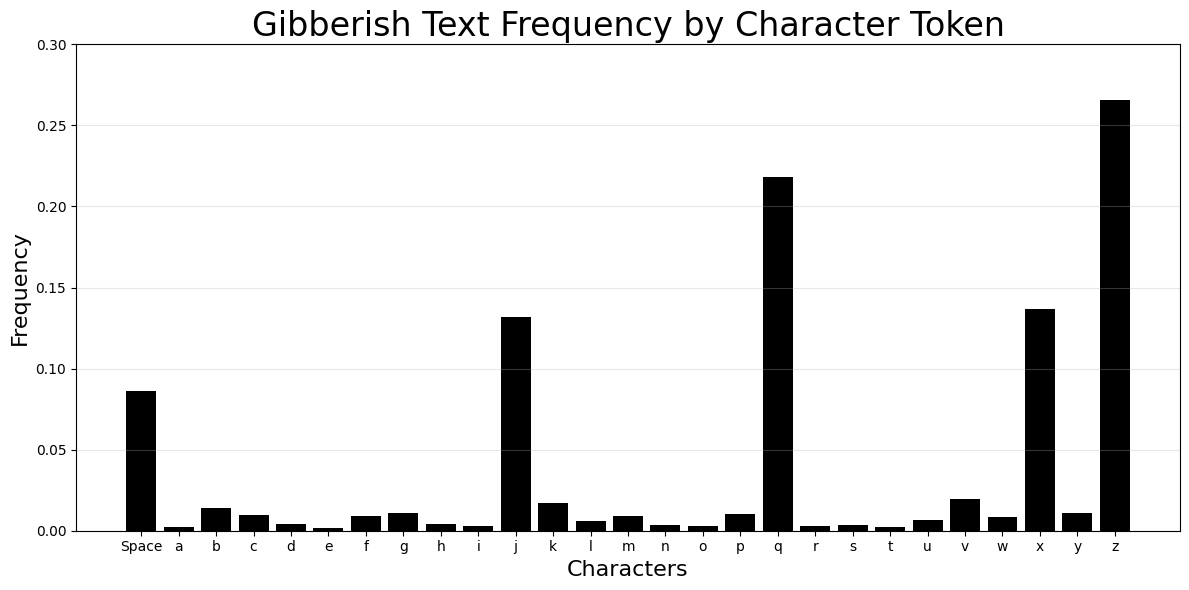

0.0862,0.0021,0.0138,0.0097,0.0043,0.0015,0.0092,0.0111,0.0044,0.0029,0.1318,0.0172,0.0061,0.0088,0.0035,0.0029,0.0105,0.2181,0.0031,0.0034,0.0021,0.0067,0.0196,0.0082,0.1365,0.0109,0.2654


In [ ]:
nprobs = [float(p) for p in gibberish.getTokenProbs().split(',')]

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(nprobs)), nprobs, color='black')

plt.title('Gibberish Text Frequency by Character Token', fontsize=24)
plt.xlabel('Characters', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(range(len(labels)), labels)
plt.grid(axis='y', alpha=0.3)

plt.ylim(0, 0.3)

plt.tight_layout()
plt.show()

print(gibberish.getTokenProbs())

In [ ]:
""" 
  Prior probability that the sentences are generated from the fake text
"""
priorLeft = 0.6
""" The Naive Bayes classifier """
nb = TokenNaiveBayes("gibberish.txt", "rush.txt", priorLeft=priorLeft)


We compute the probability that the observed character comes from the gibberish (fake) text.

Space : 0.4195
    a : 0.0429
    b : 0.6369
    c : 0.3698
    d : 0.1867
    e : 0.0228
    f : 0.5149
    g : 0.4593
    h : 0.1381
    i : 0.0623
    j : 0.9715
    k : 0.6598
    l : 0.2224
    m : 0.3587
    n : 0.0795
    o : 0.0726
    p : 0.5403
    q : 0.9982
    r : 0.0875
    s : 0.0787
    t : 0.0432
    u : 0.2952
    v : 0.7861
    w : 0.459
    x : 0.9903
    y : 0.4992
    z : 0.9945
0.4195,0.0429,0.6369,0.3698,0.1867,0.0228,0.5149,0.4593,0.1381,0.0623,0.9715,0.6598,0.2224,0.3587,0.0795,0.0726,0.5403,0.9982,0.0875,0.0787,0.0432,0.2952,0.7861,0.459,0.9903,0.4992,0.9945


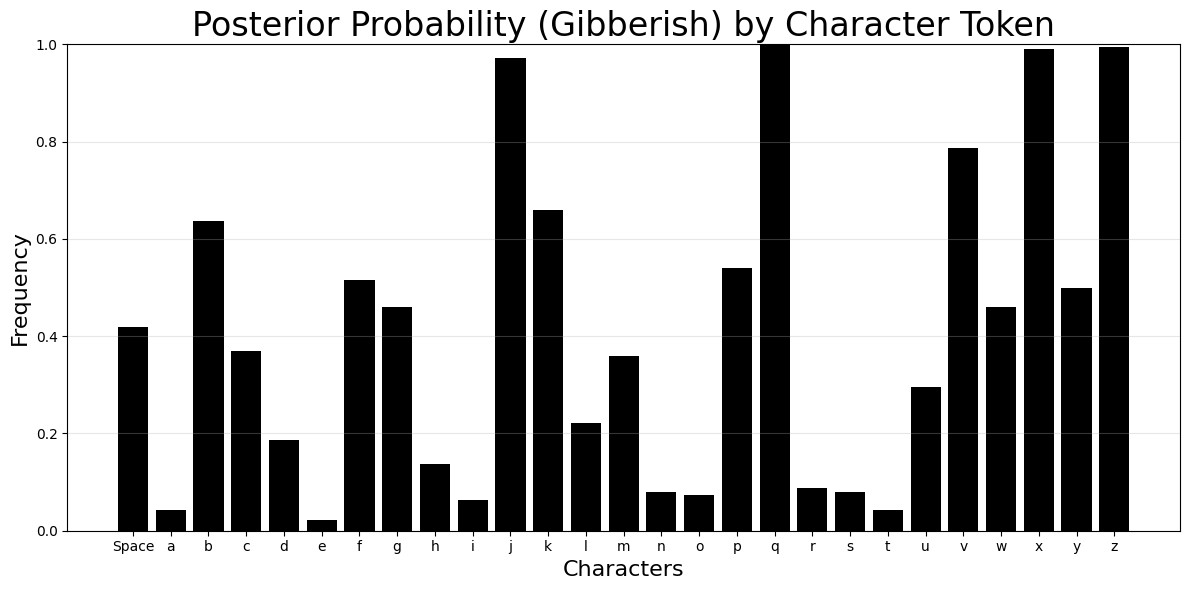

In [ ]:
nprobs = []
for token in TokenAlphabet.GetLanguage():
    # The posterior probability that token comes from the gibberish text.
    probSource = nb.TokenPosteriorProb(token)
    probFake = round(probSource, 4)
    nprobs.append(probFake)
    label = '    ' + token if token != ' ' else 'Space'
    print(label, ":", probFake)

print(','.join([str(p) for p in nprobs]))

# Plot the posterior probabilities
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(nprobs)), nprobs, color='black')

plt.title('Posterior Probability (Gibberish) by Character Token', fontsize=24)
plt.xlabel('Characters', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(range(len(labels)), labels)
plt.grid(axis='y', alpha=0.3)

plt.ylim(0, 1.0)

plt.tight_layout()
plt.show()

We classify each of the generated sentences using the Naive Bayes model. They are all found to come from the source text and not the fake text.

In [ ]:
print(','.join([str(nb.Classify(sentence)) for sentence in sentences]))

0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
